<a href="https://colab.research.google.com/github/meliy-meyada/Tensorflow-Deep-Learning-and-Artificial-Intelligence/blob/main/TF2_0_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install Tensorflow
!pip install -q tensorflow-gpu==2.8.2
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 497.9 MB 15 kB/s 
2.8.2


In [3]:
# Additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train,shape: ", x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train,shape:  (60000, 28, 28)


In [5]:
# The data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
# Number of classes
K = len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [7]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
X = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [8]:
# Compile and fit
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 70s 37ms/step - loss: 0.4217 - accuracy: 0.8464 - val_loss: 0.3352 - val_accuracy: 0.8770
Epoch 2/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2850 - accuracy: 0.8940 - val_loss: 0.2869 - val_accuracy: 0.8937
Epoch 3/15
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2360 - accuracy: 0.9116 - val_loss: 0.2614 - val_accuracy: 0.9042
Epoch 4/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1983 - accuracy: 0.9264 - val_loss: 0.2631 - val_accuracy: 0.9066
Epoch 5/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1681 - accuracy: 0.9375 - val_loss: 0.2448 - val_accuracy: 0.9130
Epoch 6/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1452 - accuracy: 0.9449 - val_loss: 0.2506 - val_accuracy: 0.9170
Epoch 7/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1210 - accuracy: 0.9548 - val_loss: 0.3064 -

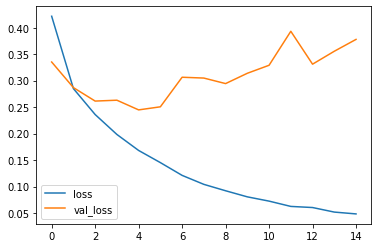

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

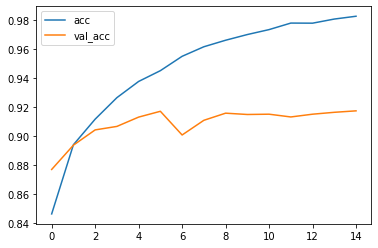

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[903   1  17  11   2   1  59   0   6   0]
 [  5 980   0   8   3   0   2   0   2   0]
 [ 23   0 885   7  48   0  37   0   0   0]
 [ 20   3   7 924  28   0  18   0   0   0]
 [  3   0  53  25 881   0  38   0   0   0]
 [  0   0   0   0   0 979   0  14   0   7]
 [132   0  65  21  74   0 696   0  12   0]
 [  0   0   0   0   0   3   0 982   0  15]
 [  3   0   3   1   4   1   1   2 983   2]
 [  1   0   0   0   0   4   0  35   0 960]]


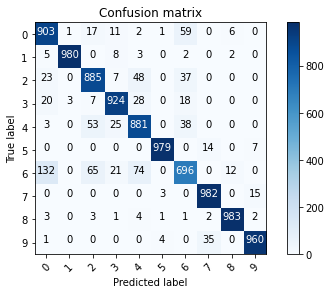

In [15]:
from matplotlib import axis
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This Funcion prints and plots the confusion matrix.
  Nornalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [16]:
# Label mapping
labels = ''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

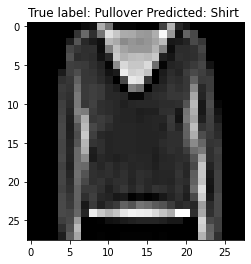

In [18]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s " % (labels[y_test[i]], labels[p_test[i]]));